In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd
warnings.filterwarnings("ignore")

In [3]:
path = r"museum_visitors.csv"
data = pd.read_csv(path)

In [5]:
data.head()

,Date,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center
0,2014-01-01,24778,4486,1581,6602
1,2014-02-01,18976,4172,1785,5029
2,2014-03-01,25231,7082,3229,8129
3,2014-04-01,26989,6756,2129,2824
4,2014-05-01,36883,10858,3676,10694


In [6]:
data.shape

(59, 5)

In [7]:
data.dtypes

Date                                    object
Avila Adobe                              int64
Firehouse Museum                         int64
Chinese American Museum                  int64
America Tropical Interpretive Center     int64
dtype: object

In [8]:
#замінимо тип даних в колонці Date
data['Date'] = pd.to_datetime(data['Date'])

In [10]:
#перевіримо чи правильно змінили
data.Date.loc[:0]

0   2014-01-01
Name: Date, dtype: datetime64[ns]

In [11]:
data.describe()

,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center
count,59.000000,59.000000,59.000000,59.000000
mean,24061.661017,6472.830508,2721.254237,7107.016949
std,5948.997414,7471.196609,1165.585196,2561.671286
min,14035.000000,3306.000000,1073.000000,2824.000000
25%,19469.500000,4412.500000,2134.000000,5424.500000
50%,23136.000000,5181.000000,2419.000000,6602.000000
75%,27502.000000,6239.500000,2942.500000,7943.000000
max,41242.000000,61192.000000,7702.000000,13490.000000


In [12]:
data.isna().sum()

Date                                    0
Avila Adobe                             0
Firehouse Museum                        0
Chinese American Museum                 0
America Tropical Interpretive Center    0
dtype: int64

In [16]:
# Перейменування колонок у формат snake_case
data.columns = data.columns.str.lower().str.replace(' ', '_')
data.columns

Index(['date', 'avila_adobe', 'firehouse_museum', 'chinese_american_museum',
       'america_tropical_interpretive_center'],
      dtype='object')

In [17]:
#Пошук дублікатів
duplicates = data[data.duplicated()]
print("Кількість дублікатів:", duplicates.shape[0])

Кількість дублікатів: 0


In [18]:
data[data.columns].nunique()

date                                    59
avila_adobe                             59
firehouse_museum                        59
chinese_american_museum                 58
america_tropical_interpretive_center    59
dtype: int64

In [247]:
#Бачимо, що chinese_american_museum одне значення повторюється. Таке може бути, тому не видаляємо його

**Про які роки містить інформацію датасет**

In [19]:
data['year'] = data['date'].dt.strftime('%Y').astype('int64')

In [20]:
data.year.loc[:0]

0    2014
Name: year, dtype: int64

In [21]:
data.head()

,date,avila_adobe,firehouse_museum,chinese_american_museum,america_tropical_interpretive_center,year
0,2014-01-01,24778,4486,1581,6602,2014
1,2014-02-01,18976,4172,1785,5029,2014
2,2014-03-01,25231,7082,3229,8129,2014
3,2014-04-01,26989,6756,2129,2824,2014
4,2014-05-01,36883,10858,3676,10694,2014


In [22]:
data.year.unique()

array([2014, 2015, 2016, 2017, 2018], dtype=int64)

Датасет містить інфомрацію про роки 2014-2018

**Обчислимо середню кількість відвідувачів для кожного музею протягом всього періоду**

In [26]:
#1 спосіб 
mean_visitors = data.mean()
mean_visitors

avila_adobe                             24061.661017
firehouse_museum                         6472.830508
chinese_american_museum                  2721.254237
america_tropical_interpretive_center     7107.016949
year                                     2015.966102
dtype: float64

In [27]:
#2 спосіб
data.describe()

,avila_adobe,firehouse_museum,chinese_american_museum,america_tropical_interpretive_center,year
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,24061.661017,6472.830508,2721.254237,7107.016949,2015.966102
std,5948.997414,7471.196609,1165.585196,2561.671286,1.413800
min,14035.000000,3306.000000,1073.000000,2824.000000,2014.000000
25%,19469.500000,4412.500000,2134.000000,5424.500000,2015.000000
50%,23136.000000,5181.000000,2419.000000,6602.000000,2016.000000
75%,27502.000000,6239.500000,2942.500000,7943.000000,2017.000000
max,41242.000000,61192.000000,7702.000000,13490.000000,2018.000000


Бачимо, що музей america_tropical_interpretive_center має найбільшу середню кількість відвідувачів протягом усього періоду

**Знайдемо мінімальну та максимальну кількість відвідувачів для кожного музею за 2018 рік**

In [28]:
visitors_2018 = data.query('year == 2018')
#спосіб 1
visitors_2018.describe()

,avila_adobe,firehouse_museum,chinese_american_museum,america_tropical_interpretive_center,year
count,11.000000,11.000000,11.000000,11.000000,11.0
mean,19791.636364,4758.272727,2897.090909,4686.090909,2018.0
std,3082.508663,1206.366784,933.869311,839.299286,0.0
min,14718.000000,3306.000000,2146.000000,3180.000000,2018.0
25%,18064.500000,4136.500000,2397.000000,4226.500000,2018.0
50%,19280.000000,4622.000000,2518.000000,4694.000000,2018.0
75%,21595.500000,4911.000000,2730.000000,5267.500000,2018.0
max,25173.000000,8013.000000,4960.000000,5837.000000,2018.0


In [29]:
#спосіб 2
display(visitors_2018.max(), visitors_2018.min())

date                                    2018-11-01 00:00:00
avila_adobe                                           25173
firehouse_museum                                       8013
chinese_american_museum                                4960
america_tropical_interpretive_center                   5837
year                                                   2018
dtype: object

date                                    2018-01-01 00:00:00
avila_adobe                                           14718
firehouse_museum                                       3306
chinese_american_museum                                2146
america_tropical_interpretive_center                   3180
year                                                   2018
dtype: object

В музеї avila_adobe найбільша кількість відвідувачів у 2018 році

**Визначити місяці з найвищою і найнижчою загальною кількістю відвідувачів серед усіх музеїв для 2015 року. Вивести назви місяців (не цифри)**

In [30]:
# створимо колонку з місяцями
data['month'] = data['date'].dt.month_name(locale = 'English')
data.head()

,date,avila_adobe,firehouse_museum,chinese_american_museum,america_tropical_interpretive_center,year,month
0,2014-01-01,24778,4486,1581,6602,2014,January
1,2014-02-01,18976,4172,1785,5029,2014,February
2,2014-03-01,25231,7082,3229,8129,2014,March
3,2014-04-01,26989,6756,2129,2824,2014,April
4,2014-05-01,36883,10858,3676,10694,2014,May


In [31]:
# стовримо окремий датафрейм з даними за 2015 рік
visitors_2015 = data.query('year == 2015')
# групуємо дані за місяцями та обчислюємо загальну кількість відвідувачів для кожного місяця
monthly_visitors = visitors_2015.groupby('month').sum()
monthly_visitors.drop(['year'], axis=1, inplace=True)
# знаходимо місяці з найвищою і найнижчою кількістю відвідувачів для кожного музею
month_with_max_visitors = monthly_visitors.idxmax()
month_with_min_visitors = monthly_visitors.idxmin()

In [32]:
monthly_visitors

,avila_adobe,firehouse_museum,chinese_american_museum,america_tropical_interpretive_center
month,,,,
April,26670,7000,3057,7254
August,30700,5383,2415,12096
December,21426,4502,2075,5967
February,15578,3742,1558,5907
January,20438,3858,1823,6250
July,41242,6111,3057,11072
June,30569,5377,2544,11102
March,21297,5390,2336,9884
May,34383,12528,4009,13207


Знову бачимо, що в музеї avila_adobe найбільша кількість відвідувачів

In [33]:
month_with_max_visitors

avila_adobe                             July
firehouse_museum                         May
chinese_american_museum                  May
america_tropical_interpretive_center     May
dtype: object

In [34]:
month_with_min_visitors

avila_adobe                              February
firehouse_museum                         February
chinese_american_museum                 September
america_tropical_interpretive_center     February
dtype: object

In [35]:
# Виводимо назви місяців
print(f"Місяць з найвищою кількістю відвідувачів: {month_with_max_visitors.max()} ")
print(f"Місяць з найнижчою кількістю відвідувачів: {month_with_min_visitors.min()}")

Місяць з найвищою кількістю відвідувачів: May 
Місяць з найнижчою кількістю відвідувачів: February


**Порівняти кількість відвідувачів музею "Avila Adobe" у літні і зимові місяці 2018 року**

In [37]:
# Вибірка даних для літніх місяців 2018 року та сума відвідучавів дмузею "Avila Adobe"
summer_visitors = data.query('(year == 2018) & (month in ["June", "July", "August"])')
summer_avila_adobe_visitors = summer_visitors['avila_adobe'].sum()

# Вибірка даних для зимових місяців 2018 року та сума відвідучавів дмузею "Avila Adobe"
winter_visitors = data.query('(year == 2018) & (month in ["December", "January", "February"])')
winter_avila_adobe_visitors = winter_visitors['avila_adobe'].sum()

# Виведення результатів порівняння
print(f"Кількість відвідувачів музею Avila Adobe у літні місяці 2018 року: {summer_avila_adobe_visitors}")
print(f"Кількість відвідувачів музею Avila Adobe у зимові місяці 2018 року: {winter_avila_adobe_visitors}")


Кількість відвідувачів музею Avila Adobe у літні місяці 2018 року: 66122
Кількість відвідувачів музею Avila Adobe у зимові місяці 2018 року: 30983


## Висновок: 
Влітку 2018 в 2 рази більше відвідувачів.Якщо така тенденція досі дійсна, то на зиму можна придумати додаткові заходи, літературні вечори і тд для музею

**Знайти кореляцію між кількістю відвідувачів в кожному з музеїв та датами у 2016 році**

In [38]:
visitors_2016 = data.query('year == 2016')

# Вибірка лише колонок, які представляють кількість відвідувачів у кожному музеї
museum_columns = ['avila_adobe', 'firehouse_museum', 'chinese_american_museum',
       'america_tropical_interpretive_center']
museum_data = visitors_2016[museum_columns]

# Вибірка дат у 2016 році
dates_2016 = visitors_2016['date']

# Розрахунок кореляції за допомогою кореляції Пірсона
correlation_matrix = pd.concat([museum_data, dates_2016], axis=1).corr()

# Виведення результатів
print("Матриця кореляції між кількістю відвідувачів у музеях та датами у 2016 році:")
correlation_matrix

Матриця кореляції між кількістю відвідувачів у музеях та датами у 2016 році:


,avila_adobe,firehouse_museum,chinese_american_museum,america_tropical_interpretive_center
avila_adobe,1.000000,0.737200,0.089054,0.436561
firehouse_museum,0.737200,1.000000,0.553935,0.247389
chinese_american_museum,0.089054,0.553935,1.000000,0.443800
america_tropical_interpretive_center,0.436561,0.247389,0.443800,1.000000


**Побудуємо heatmap кореляції для попереднього завдання**

In [39]:
sns.set(style = "whitegrid",
    rc    = {'figure.figsize':(10,6)},
    palette = "husl"
)

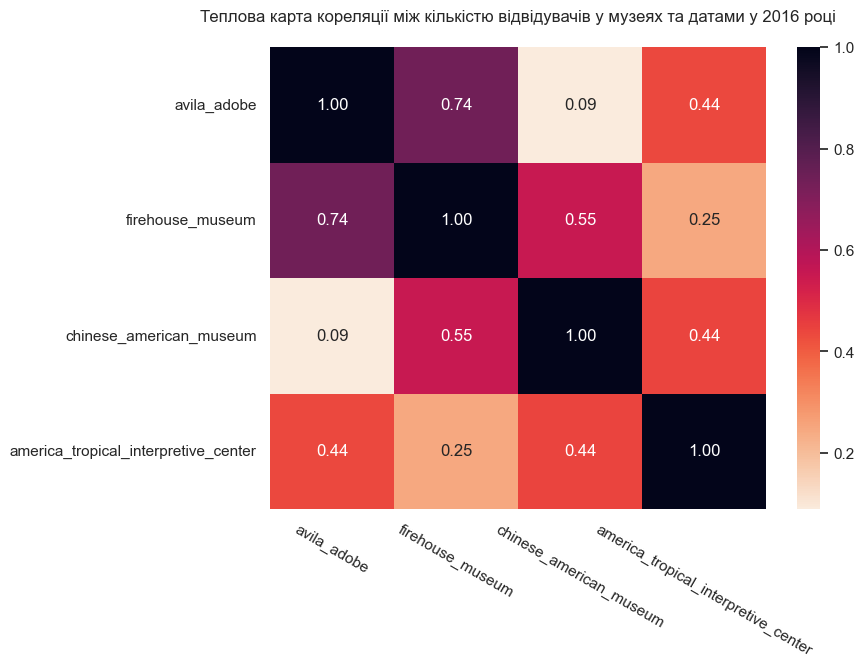

In [40]:
# Використовуємо heatmap для візуалізації кореляційної матриці
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="rocket_r", fmt=".2f")

# Налаштування графіка
plt.title('Теплова карта кореляції між кількістю відвідувачів у музеях та датами у 2016 році\n')
plt.xticks(rotation=-30)
plt.show();

Ми вбачаємо високу позитивну взаємозв'язок між:

1. avila_adobe та firehouse_museum (0.74)
   - Високий позитивний зв'язок, що може вказувати на те, що кількість відвідувачів цих двох музеїв часто зростає або зменшується одночасно.

2. firehouse_museum та chinese_american_museum (0.55)
   - Позитивний зв'язок, який може свідчити про те, що ці два музеї можуть привертати або залучати подібну аудиторію.

3. avila_adobe та america_tropical_interpretive_center (0.44)
   4. chinese_american_museum та america_tropical_interpretive_center (0.44)
   - Позитивний зв'язок, що може свідчити про те, що ці музеї мають певні схожі аспекти відвідуваності.

**Побудувати графік ліній для кожного музею, показуючи їхню відвідуваність протягом 2017 року.**

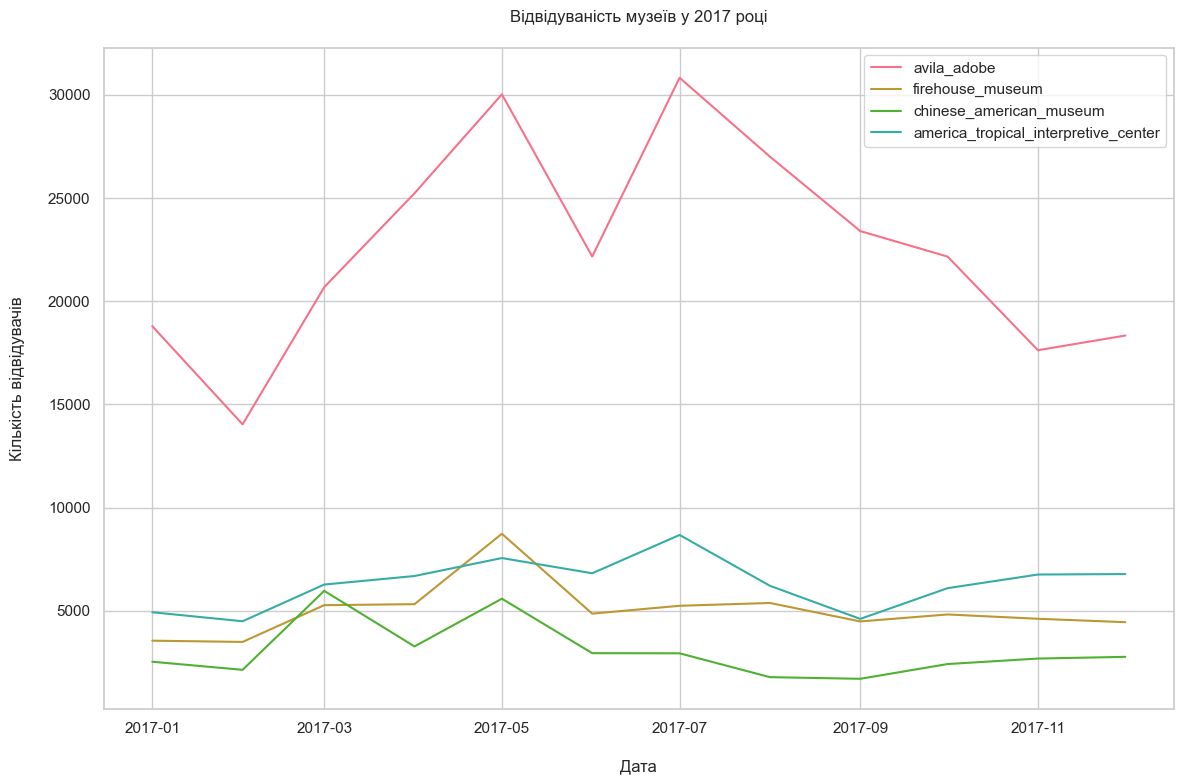

In [41]:
visitors_2017 = data.query('year == 2017')
# Побудова графіка ліній
plt.figure(figsize=(12, 8))
for museum in museum_columns:
    plt.plot(visitors_2017['date'], visitors_2017[museum], label=museum)
# Налаштування графіка
plt.title('Відвідуваність музеїв у 2017 році\n')
plt.xlabel('\nДата')
plt.ylabel('Кількість відвідувачів\n')
plt.legend()
plt.tight_layout();

**Побудувати графіки розсіювання для кожного музею за 2018 рік**

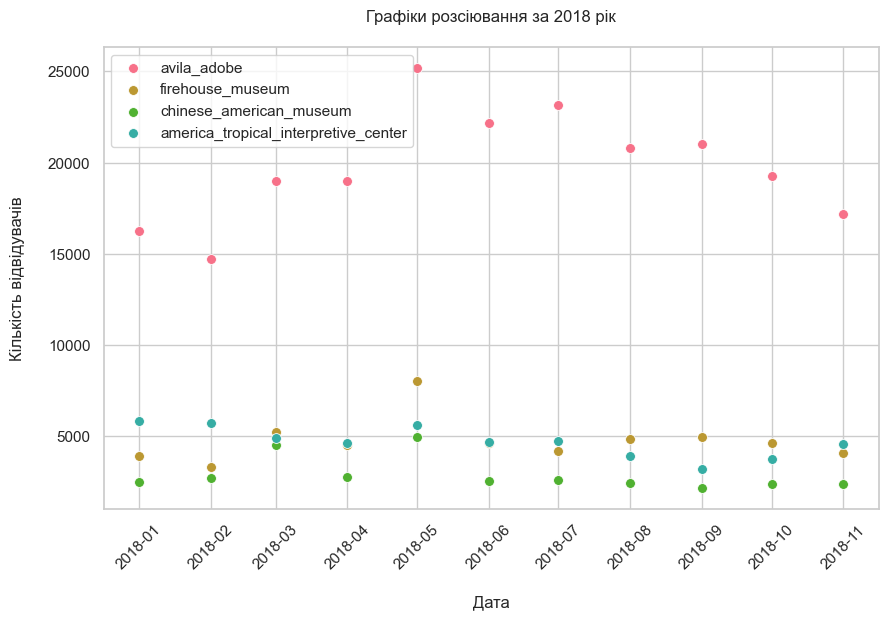

In [42]:
for museum in museum_columns:
    sns.scatterplot(x='date', y=museum, data=visitors_2018, label=museum, s=50)
# Налаштування графіку
plt.title('Графіки розсіювання за 2018 рік\n')
plt.xlabel('\nДата')
plt.ylabel('Кількість відвідувачів\n')
plt.legend()
# Поворот дат на осі X на 45 градусів
plt.xticks(rotation=45)
# Відображення графіка
plt.show()

**Гістограма відвідуваності за місяцями кожного музею. Вивести 4 графіки: за 2014, 2015, 2016, 2017 роки. Графіки розташовані два зверху, два знизу, колір першого графіка - синій, другого зелений, третього жовтий, четвертого сірий.**

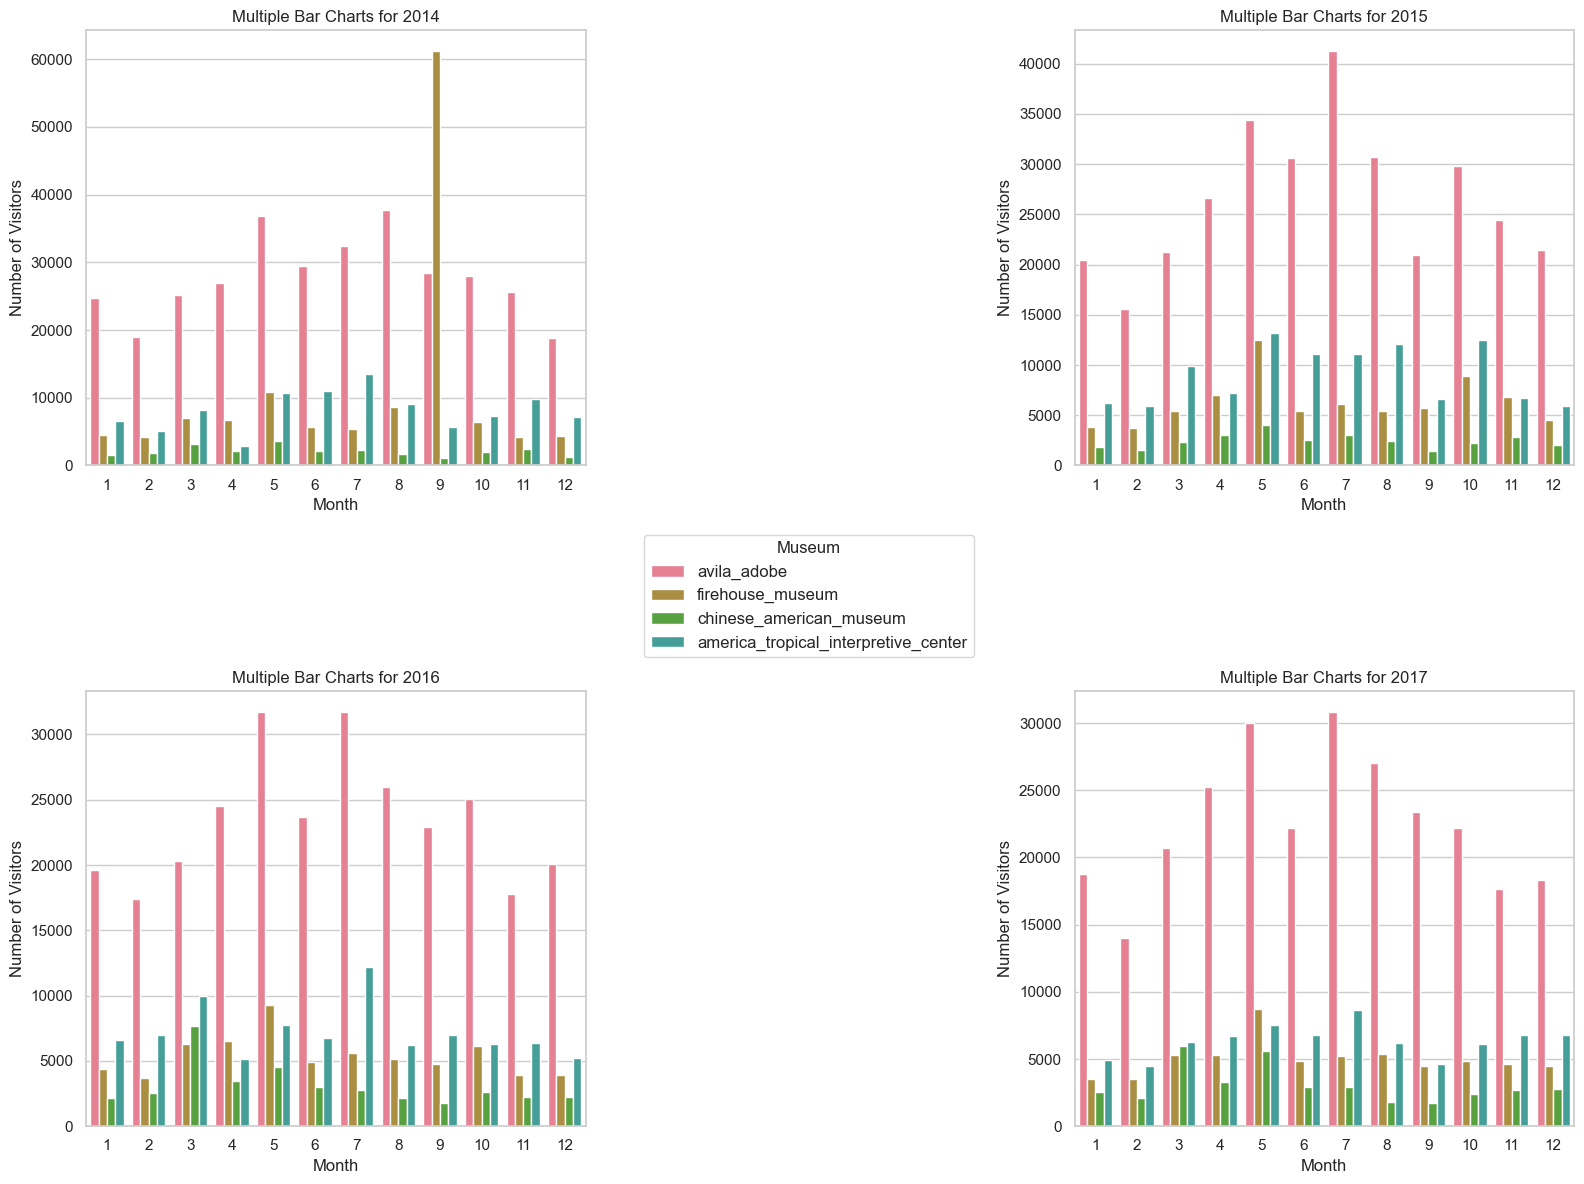

In [43]:
# Замінимо назви місяці на числа для кращої читабельності графіка
data['month'] = data['date'].dt.month
# Побудова графіків
plt.figure(figsize=(16, 12))
for i, year in enumerate([2014, 2015, 2016, 2017]):
    plt.subplot(2, 2, i + 1)  # Розташування графіків у вигляді 2x2
    # Вибірка даних за рік
    data_by_year = data[data['year'] == year]
    # Побудова multiple bar charts
    sns.barplot(x='month', y='value', hue='variable', data=pd.melt(data_by_year, id_vars=['month'], value_vars=museum_columns))
    # Налаштування заголовка та осей графіка
    plt.title(f'Multiple Bar Charts for {year}')
    plt.xlabel('Month')
    plt.ylabel('Number of Visitors')
    # Додавання легеди
    if i == 0: 
        plt.legend(title='Museum', bbox_to_anchor=(1.1, -0.30), loc="center left", fontsize='medium')
    else:
        plt.legend('', frameon=False)
plt.tight_layout()
plt.show();

З усіх графіків вище можемо знову зробити висновок, що в музеї avila_adobe найбільша кількість відвідувачів по усіх роках.

# Висновок

Під час аналізу датасету про відвідувачів музеїв були виконані наступні завдання:

1. **Очищення та підготовка даних:**
   - Виконано корекцію формату дат та їх перетворення у необхідний.
   - Перейменовано колонки у стилі snake_case.
   - Додано нові колонки, такі як місяць та рік, для полегшення аналізу за цими параметрами.
   - Розраховано середню кількість відвідувачів для кожного музею.

2. **Аналіз та візуалізація:**
   - Проведено аналіз кількості відвідувачів музеїв за роками та місяцями.
   - Досліджено кореляцію між кількістю відвідувачів у музеях та датами.
   - Побудовано гістограми відвідуваності за місяцями для кожного музею у різні роки.
   - Створено графіки розсіювання відвідуваності музеїв у 2018 році.
   - Розроблено лінійний графік відвідуваності музеїв у 2017 році.
   - Побудовано теплову карту кореляції відвідуваності музеїв у 2016 році.

В результаті проведеного аналізу отримали інсайти щодо динаміки відвідуваності музеїв, виявили певні тенденції та розкрили взаємозв'язки між різними параметрами. Використовуючи візуалізації, зробили дані більш зрозумілими та доступними для подальшого аналізу.
